# Лабораторна робота №1

# Лабораторна робота №1: Розуміння задачі і області застосування

*Мета: Вибір та обгрунтування набору даних. Фаза Business understanding за СRISP-DM.*

Перша лабораторна робота призначена для обрання та мотивації обраного набору даних. Основними вимогами є: 


*   Табличне представлення даних (не зображення або часовий ряд)
*   Мінімум 250 записів - чим краще тим більше , в рамках розумного (менша кількість записів можлива але обговорювана)
*   Мінімум 4 колонки з даними по яким можна буде виконувати аналіз / моделювання і візуалізацію (колонки типу ID, номер або службові не рахуються)
* Один варіант набору даних на групу



### 1. Який набір даних ви обрали?

Для виконання лабораторних робіт було обрано набір даних [Cervical Cancer Risk Factors for Biopsy](https://www.kaggle.com/loveall/cervical-cancer-risk-classification). Набір даних був зібраний в медичному закладі «Hospital Universitario de Caracas» в Каракасі, Венесуела. Набір даних містить демографічну інформацію, звички та історичні медичні записи 858 пацієнтів по 32 ознакам для 4 цільових ознак – результат дослідження раку шийки матки з використанням процедури кольпоскопії різними методами (проба Гінзельмана, проба Шиллера, цитологія та біопсія).

### 2. Які у вас ідеї / теорії / припущення що у вибраному домені можна покращити з аналізом та видобуванням даних?

Завдяки аналізу та видобуванню даних з досліджуваного набору даних можна отримати інформацію та сформулювати результати щодо профілактики та діагностики раку шийки матки, а саме:

- встановити взаємозвʼязок між виникненням захворювання та демографічними ознаками й анамнезом пацієнтів;
- виявити основну групу ризику та значення ознак, що характеризують більшу ймовірність розвинення захворювання;
- дослідити множину супутніх захворювань при позитивному результаті діагностики раку шийки матки.

### 3. Які проблеми є у області з якої ви взяли дані? Що є "bottleneck" у даному напрямі, що можна автоматизувати?

Попри зменшення рівня смертності від раку шийки матки у Сполучених Штатах Америки на 74% з 1955 по 1992 рік завдяки посиленню скринінгу та ранньому виявленню з використанням тестування, залишається актуальною проблема запобігання та діагностування захворювання на початковому етапі з дослідженням анамнезу та демографічної інформації пацієнта. 

Автоматизація аналізу великої кількості вхідних даних дозволить встановити кореляційні звʼязки між даними пацієнта та ризиком позитивного результату діагностування раку шийки матки, що дозволить запобігти розвиненню захворювання у пацієнта в майбутньому та позитивним шляхом вплинути на статистику захворюваності та смертності від раку шийки матки.

### 4. Що за ризики / складності ви припускаєте можуть очікувати вас в процесі роботи з даними?

У випадку наявності хвороб, що передаються статевим шляхом, кількість вхідних даних не є достатньою для ефективного застосування категоризації. Прикладом є вірусна інфекція контагіозний молюск, дані про наявність якої присутні лише для одного пацієнта з 858 респондентів. У випадку прогнозування наявності раку шийки матки за множиною наявних хвороб, необхідно звернутися до інших ознак або до додаткових наборів даних.

Також виявленим ризиком є можлива невідповідність результатів в процесі класифікації та прогнозування через відсутність даних для деяких ознак. Близько 12% респондентів не надали інформацію про наявність чи відсутність певних хвороб, що передаються статевим шляхом, використання гормональної контрацепції тощо. Таким чином виникає складність у необхідності агрегованого та комплексного аналізу даних за декількома наявними ознаками.

### 5. В рамках добування даних яким методом ваша проблема або ідея може бути вирішена?

Згідно з наведеною метою для аналізу та видобування даних, для вирішення проблеми можуть бути застосовані такі методи:

- класифікація та прогнозування виникнення захворювання в залежності від значення ознак;
- кластеризація для виявлення основної групи ризику.

# Лабораторна робота №2

# Лабораторна робота №2: Аналіз та опис характеристик вхідного набору даних

*Мета: Навчитися базовому фунукціоналу pandas/matplotlib для числельного і візуального аналізу вхідних даних та їх характеристик.*

### 1. Завантажте набір даних, і у Data Frame за допомогою pandas відобразіть перші 10 записів.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

from scipy import stats

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.cluster import KMeans

from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('risk_factors_cervical_cancer.csv')
df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


### 2. Опишіть колонки які ви використовуєте для аналізу в подальшому, що за дані в них зберігаються якщо потрібен опис або їх призначення неочевидне/специфічне для домену.

Для аналізу даних в подальшому було обрано такі ознаки з набору даних (решта ознак не були використані через нерепрезентативність даних або малу кількість даних для цієї ознаки):

1. `Age` – вік респондента;
2. `Number of sexual partners` – кількість статевих партнерів респондента;
3. `First sexual intercourse` – вік респондента під час першого статевого акту;
4. `Num of pregnancies` – кількість вагітностей респондента;
5. `Smokes` – факт паління респондентом;
6. `Smokes (years)` – час (кількість років), протягом яких палив респондент;
7. `Smokes (packs/year)` – кількість пачок сигарет, що палив респондент щороку;
8. `Hormonal Contraceptives` – факт використання гормональної контрацепції респондентом;
9. `Hormonal Contraceptives (years)` – час (кількість років), протягом яких респондент використовував гормональну контрацепцію;
10. `IUD` – факт використання протизаплідних спіралей респондентом;
11. `IUD (years)` – час (кількість років), протягом яких респондент використовував протизаплідні спіралі;
12. `STDs` – факт наявності у респондента хвороб, що передаються статевим шляхом;
13. `STDs (number)` – кількість наявних у респондента хвороб, що передаються статевим шляхом;
14. `STDs: Time since first diagnosis` – час (кількість років) з першого діагностування респондентом хвороби, що передається статевим шляхом;
15. `STDs: Time since last diagnosis` – час (кількість років) з останнього діагностування респондентом хвороби, що передається статевим шляхом;
16. `Dx:CIN` – факт діагностування у респондента дисплазії шийки матки;
17. `Dx:HPV` – факт діагностування у респондента вірусу папіломи людини;
18. `Biopsy` – результат дослідження раку шийки матки методом біопсії (цільова ознака).

### 3. Чи є категоріальні / числові дані? Виведіть усі варіанти категорій для певної колонки. Чи є закодовані дані - що вони значать у вашому випадку?
 

До **категоріальних даних** з обраних ознак відносяться дихотомічні змінні, що включають лише два значення – істина і хибність, які кодуються відповідними значеннями `1.0` і `0.0`:

1. `Smokes` – факт паління респондентом;
2. `Hormonal Contraceptives` – факт використання гормональної контрацепції респондентом;
3. `IUD` – факт використання протизаплідних спіралей респондентом;
4. `STDs` – факт наявності у респондента хвороб, що передаються статевим шляхом;
5. `Dx:CIN` – факт діагностування у респондента дисплазії шийки матки;
6. `Dx:HPV` – факт діагностування у респондента вірусу папіломи людини;
7. `Biopsy` – результат дослідження раку шийки матки методом біопсії (цільова ознака).

До **дискретних числових даних** з обраних ознак відносяться змінні, які приймають лише певні числові значення (в певному інтервалі значень):

1. `Age` – вік респондента;
2. `Number of sexual partners` – кількість статевих партнерів респондента;
3. `Num of pregnancies` – кількість вагітностей респондента.

До **неперервних числових даних** з обраних ознак відносяться змінні, які приймають будь-які числові значення (в певному інтервалі значень):

1. `First sexual intercourse` – вік респондента під час першого статевого акту;
2. `Smokes (years)` – кількість років, протягом яких палив респондент;
3. `Smokes (packs/year)` – кількість пачок сигарет, що палив респондент щороку;
4. `Hormonal Contraceptives (years)` – кількість років, протягом яких респондент використовував гормональну контрацепцію;
5. `IUD (years)` – кількість років, протягом яких респондент використовував протизаплідні спіралі;
6. `STDs (number)` – кількість наявних у респондента хвороб, що передаються статевим шляхом;
7. `STDs: Time since first diagnosis` – час (кількість років) з першого діагностування респондентом хвороби, що передається статевим шляхом;
8. `STDs: Time since last diagnosis` – час (кількість років) з останнього діагностування респондентом хвороби, що передається статевим шляхом.

### 4. Виведіть максимальні / мінімальні значення для числових колонок. Чи вони коректні в реаліях домену? Чи вони взагалі є подібним до реальності числом чи швидше заглушкою/помилкою?

Нижче наведено мінімальні та максимальні значення для ознак набору даних. Для числових даних граничні значення є коректними; для категоріальних значень, що закодовані числовими значеннями – мінімальні та максимальні значення є рівними 0.0 або 1.0, що відповідають дихотомічному логічному значенню.

In [3]:
df_coerced = df.apply(pd.to_numeric, errors='coerce')
pd.concat([df_coerced.min().rename('Minimum'), df_coerced.max().rename('Maximum')], axis=1)

,Minimum,Maximum
Age,13.0,84.0
Number of sexual partners,1.0,28.0
First sexual intercourse,10.0,32.0
Num of pregnancies,0.0,11.0
Smokes,0.0,1.0
Smokes (years),0.0,37.0
Smokes (packs/year),0.0,37.0
Hormonal Contraceptives,0.0,1.0
Hormonal Contraceptives (years),0.0,30.0
IUD,0.0,1.0


### 5. Чи є у вас у даних пусті/null/нулі, або інакшим чином некоректні/незаповнені записи? Наскільки ці колонки для вас критичні, якщо такі є? 

У вхідному набору даних для нецільових ознак є пропущені значення, які закодовано символом `?`. Для певних ознак (див. фраг. 4) відношення кількості пропущених значень до загальної кількості є таким, що робить подальший аналіз і опрацювання даних за даною ознакою нерепрезентативним. Аналогічним є твердження щодо ознак з єдиним значенням з пропущенними даними (див. фраг. 5). Некоректних значень для ознак на даному етапі відмічено не було.

З точки зору критичності пропущених значень виникають такі актуальні проблеми для опрацювання даних:

* Через кодування пропущених значень символом `?`, ознаки з пропущеними значеннями (нецільові ознаки окрім віку) відповідають типу `object`, незважаючи на числову семантику значень. Отже, на етапі підготовки даних потрібно буде провести конвертування типів для подальшої коректної обробки даних.
* При моделюванні та оцінці моделі, потрібно врахувати можливу наявність зміщення та дисперсії в моделі через пропущення значень нецільових ознак.

In [4]:
pd.DataFrame(
    [
        df['STDs: Time since first diagnosis'].value_counts(normalize=True)['?'],
        df['STDs: Time since last diagnosis'].value_counts(normalize=True)['?']
    ],
    columns=['Missing data ratio'],
    index=['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
)

,Missing data ratio
STDs: Time since first diagnosis,0.917249
STDs: Time since last diagnosis,0.917249


In [ ]:
pd.DataFrame([
    df['STDs:AIDS'].value_counts(),
    df['STDs:cervical condylomatosis'].value_counts()
])

### 6. Виведіть за допомогою matplotlib/seaborn 3 або більше розподілів для даних; що з них можна дізнатися цікавого/корисного для нас? Який тип ймовірносного розподілу для них найближчий?

Для набору даних було побудовано такі розподіли для даних (див. фраг. 6):

1. Розподіл кількості респондентів за віком (найближчим розподілом є нормальний розподіл з відʼємним значенням математичного сподівання);
2. Розподіл кількості респондентів за кількістю років, протягом яких палив респондент (найближчим розподілом є розподіл Парето);
3. Розподіл кількості респондентів за кількістю статевих партнерів (найближчим розподілом є розподіл хі-квадрат).

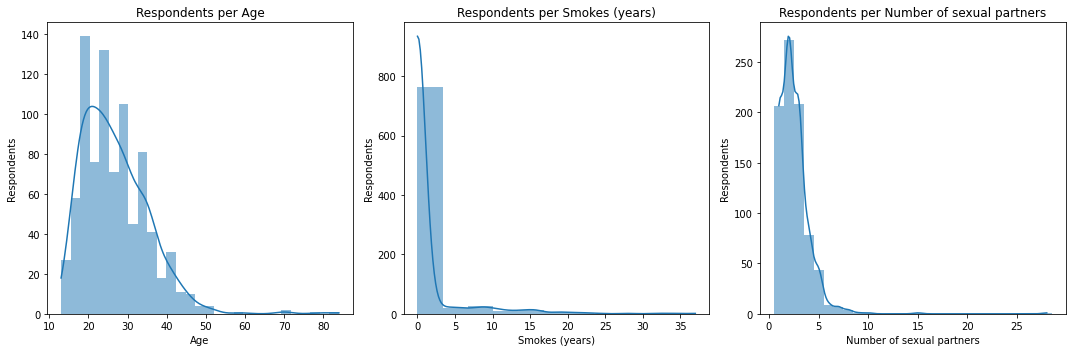

In [6]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(df_coerced['Age'], kde = True, linewidth=0)
plt.title('Respondents per Age')
plt.xlabel('Age')
plt.ylabel('Respondents')

plt.subplot(1, 3, 2)
sns.histplot(df_coerced['Smokes (years)'], kde = True, linewidth=0)
plt.title('Respondents per Smokes (years)')
plt.xlabel('Smokes (years)')
plt.ylabel('Respondents')

plt.subplot(1, 3, 3)
sns.histplot(df_coerced['Number of sexual partners'], kde = True, linewidth=0,  discrete=True)
plt.title('Respondents per Number of sexual partners')
plt.xlabel('Number of sexual partners')
plt.ylabel('Respondents')

plt.tight_layout()
plt.show()


### 7. Виведіть 3 графіки за допомогою matplotlib/seaborn/ggplot/altair для ваших колонок. Що з них корисного / цікавого можна дізнатися?

Нижче наведено результати дослідження раку шийки матки з використанням процедури кольпоскопії різними методами (проба Гінзельмана, проба Шиллера, цитологія та біопсія). Кількість респондентів з позитивним результатом дослідження є заданою в спільних межах, незважаючи на різну природу методів дослідження.

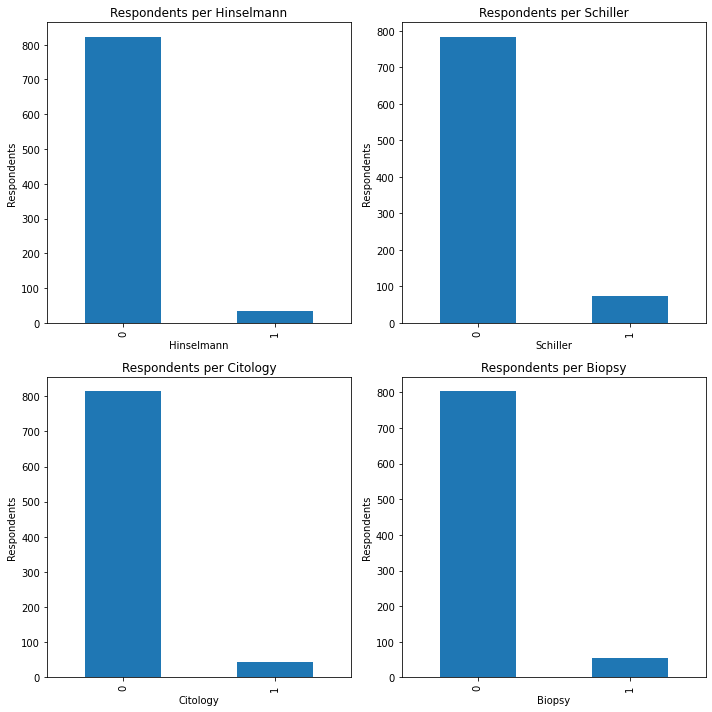

In [7]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
df['Hinselmann'].value_counts().plot(kind='bar')
plt.title('Respondents per Hinselmann')
plt.xlabel('Hinselmann')
plt.ylabel('Respondents')

plt.subplot(2, 2, 2)
df['Schiller'].value_counts().plot(kind='bar')
plt.title('Respondents per Schiller')
plt.xlabel('Schiller')
plt.ylabel('Respondents')

plt.subplot(2, 2, 3)
df['Citology'].value_counts().plot(kind='bar')
plt.title('Respondents per Citology')
plt.xlabel('Citology')
plt.ylabel('Respondents')

plt.subplot(2, 2, 4)
df['Biopsy'].value_counts().plot(kind='bar')
plt.title('Respondents per Biopsy')
plt.xlabel('Biopsy')
plt.ylabel('Respondents')

plt.tight_layout()
plt.show()

### 8. Виведіть кореляційну матрицю або heatmap для ваших даних. Чи є цікаві / до того не замітні кореляції між даними? Чи вони були очевидні до того або їх можна пояснити гіпотезою з вашого боку? Наведіть 3 приклади.

Завдяки побудованій теплокарті на основі кореляційної матриці набору даних (див. фраг. 8) було відмічено парну кореляцію між такими ознаками:

* Відʼємна кореляція між віком респондента під час першого статевого акту і фактом наявності у респондента інфекційного захворювання сифілісу; 
* Додатна кореляція між кількістю років, протягом яких палив респондент і кількістю пачок сигарет, що палив респондент щороку;
* Додатна кореляція між віком респондента і кількістю вагітностей респондента;
* Відʼємна кореляція між фактом використання гормональної контрацепції респондентом і фактом наявності у респондента вірусу імунодефіциту людини.

Аналогічним чином була відмічена додатна кореляція між результатами дослідження раку шийки матки з використанням процедури кольпоскопії різними методами (проба Гінзельмана, проба Шиллера, цитологія та біопсія).

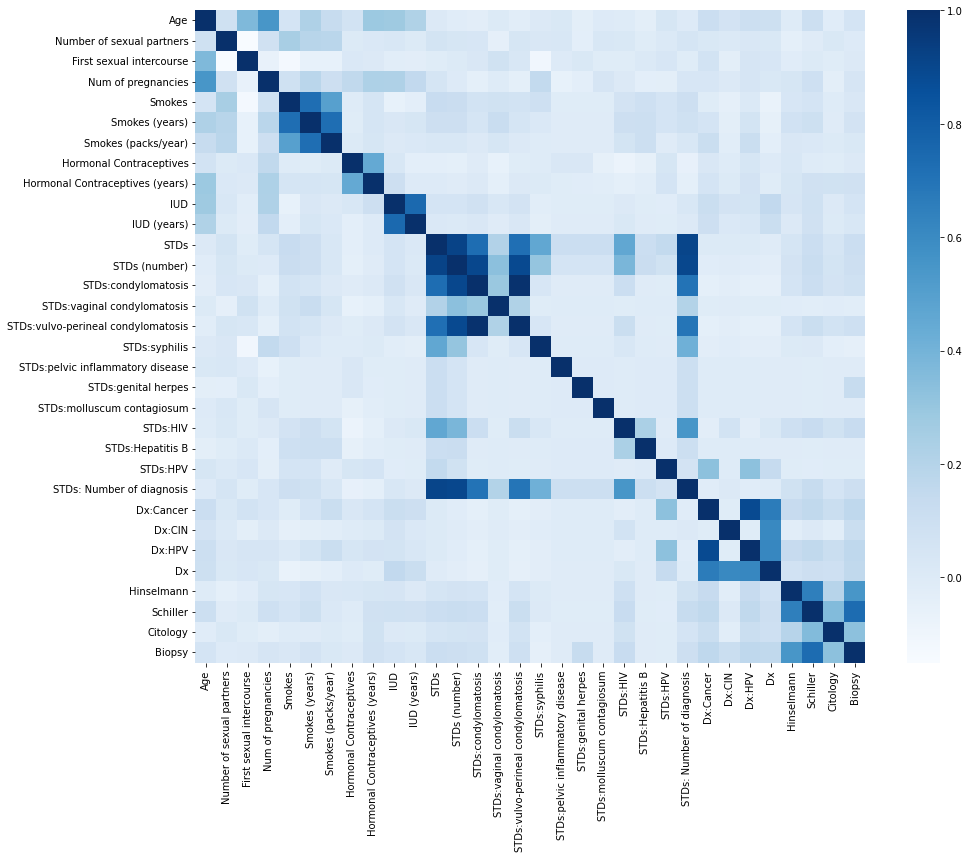

In [8]:
df_trimmed = df_coerced.drop([
    'STDs: Time since first diagnosis', 
    'STDs: Time since last diagnosis', 
    'STDs:AIDS', 
    'STDs:cervical condylomatosis'
], axis=1)

plt.figure(figsize=(15,12))
sns.heatmap(df_trimmed.corr(), cmap='Blues')

plt.show()

# Лабораторна робота №3

# Лабораторна робота №3: Підготовка та очищення даних

*Мета: Навчитися базовому фунукціоналу pandas для обробки та підготовки даних до моделювання та використання.* 

### 1. Завантажте набір даних у Data Frame.

In [9]:
df = pd.read_csv('risk_factors_cervical_cancer.csv', na_values='?')

df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,NaN,NaN,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,NaN,NaN,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,NaN,NaN,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,NaN,NaN,0,0,0,0,0,0,0,0


### 2. Видаліть ті колонки, які вам не потрібні для подальшого аналізу, залишивши ті, що ви вибрали в рамках 2 лабораторної роботи.

In [10]:
df.drop([
    'STDs:AIDS', 
    'STDs:cervical condylomatosis',
    'STDs: Number of diagnosis',
    'Dx:Cancer',
    'Dx'
], axis=1, inplace=True)

df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,0.0,0.0,NaN,NaN,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,0.0,0.0,NaN,NaN,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,0,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,0.0,0.0,NaN,NaN,0,0,0,0,0,0


### 3. Скільки % записів у ваших колонках є пусті / null? Виведіть для кожного стовпця відсоток таких записів. Якщо таких записів більше 50% - вартує видалити такий стовпець чи ні? Якщо так - видаліть.

Нижче наведено відсоткове відношення пропущених значень для ознак заданого набору даних (див. фраг. 11). 

Для часу (кількості років) з першого й останнього діагностувань респондентом хвороби, що передається статевим шляхом, відношення пропущених значень є понад 90%. Аналіз кореляцій між ознаками та побудова моделі аналізу даних є можливими, але отримані результати не будуть достатньої точності для формування остаточного висновку. Отже, має сенс видалити ці дві ознаки з набору даних для його подальшого аналізу.

In [11]:
df.isnull().mean().to_frame('Missing data ratio')

,Missing data ratio
Age,0.000000
Number of sexual partners,0.030303
First sexual intercourse,0.008159
Num of pregnancies,0.065268
Smokes,0.015152
Smokes (years),0.015152
Smokes (packs/year),0.015152
Hormonal Contraceptives,0.125874
Hormonal Contraceptives (years),0.125874
IUD,0.136364


In [12]:
df.drop([
    'STDs: Time since first diagnosis', 
    'STDs: Time since last diagnosis'
], axis=1, inplace=True)

df.head(10)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.000000,37.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.000000,0.0,1.0,15.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.000000,3.4,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.000000,0.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.8,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


### 4. Перевірте свої записи на дублікати. Якщо такі є - це помилкові записи чи подібні, але окремі? Чи є у вас колонки з різними назвами, але які містять однакову інформацію?

Нижче наведено згруповані записи, що містять однаковий набір значень ознак (див. фраг. 13). Через відсутність унікального ідентифікатора запису серед ознак, неможливо остаточно підтвердити дублювання записів, отже було прийнято рішення не визначати той самий набір ознак як дублікат серед записів набору даних.

Колонок у табличному вигляді набору даних з різними назвами для тої самої ознаки знайдено не було.

In [13]:
df[df.duplicated(keep=False)].transform(np.sort)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
60,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
66,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
143,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
206,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
220,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
234,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
250,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
255,16,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
293,16,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


### 5. Чи є у вас помилки у назвах колонок? Якщо так - виправте, перейменувавши їх.

Нижче наведено назви ознак, що використовуватимуться в подальшому аналізі набору даних (див. фраг. 15), при цьому помилок у назвах знайдено не було, але для забезпечення однорідності назв ознак було перейменовано їх підмножину (див. фраг. 14).

In [14]:
df.rename(columns={
    'Num of pregnancies': 'Number of pregnancies', 
    'Hormonal Contraceptives': 'Hormonal contraceptives', 
    'Hormonal Contraceptives (years)': 'Hormonal contraceptives (years)'
}, inplace=True)

In [15]:
pd.DataFrame({'Column name': df.columns})

,Column name
0,Age
1,Number of sexual partners
2,First sexual intercourse
3,Number of pregnancies
4,Smokes
5,Smokes (years)
6,Smokes (packs/year)
7,Hormonal contraceptives
8,Hormonal contraceptives (years)
9,IUD



### 6. Перегляньте значення категорій, якщо стовпці з такими даними є. Чи є вони справді унікальні, чи є помилкові дублікати? 

Нижче наведено значення категорій для категоріальних даних (див. фраг. 15). Серед усіх зазначених ознак категоріального типу даних, наявними є лише два унікальні значення – `0.0` і `1.0`, які відповідають логічним значенням хибності й істинності відповідно.

In [16]:
df[[
    'Smokes', 
    'Hormonal contraceptives',
    'IUD',
    'STDs',
    'Dx:CIN',
    'Dx:HPV',
    'Biopsy'
]].apply(pd.value_counts)

,Smokes,Hormonal contraceptives,IUD,STDs,Dx:CIN,Dx:HPV,Biopsy
0.0,722,269,658,674,849,840,803
1.0,123,481,83,79,9,18,55



### 7. В рамках 2 лабораторної чи у вас в даних є outliers? Якщо є - заберіть той % або кількість, що у вашому випадку є оптимальним.

Для визначення статистичних викидів було застосовано параметр стандартизованої оцінки (z-score) для трьох ознак дискретних числових даних та однієї ознаки неперервних числових даних. Як граничне значення оцінки було обрано найбільш практичне значення, яке є рівним 3.0.

Нижче наведено визначені викиди (див. фраг. 16). Для 858 записів з набору даних, 123 записи було визначено як викиди за однією з чотирьох ознак.

Серед [найбільш розповсюджених причин](https://en.wikipedia.org/wiki/Outlier) виникнення викидів можна виділити викинення через помилку вимірювання і виникнення через незвичайну природу вхідних даних. Для обраного набору даних жодна з причин не є актуальною. В результаті дослідження необхідності видалення статистичних викидів, було прийнято рішення побудови моделі для набору даних із записами викидами.

In [17]:
THRESHOLD = 3.0

z = np.abs(stats.zscore(df, nan_policy='omit')) < THRESHOLD

df[~z[[
    'Age', 
    'Number of sexual partners', 
    'First sexual intercourse', 
    'Number of pregnancies'
]].all(axis=1)]

,Age,Number of sexual partners,First sexual intercourse,Number of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal contraceptives,Hormonal contraceptives (years),IUD,...,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy
2,34,1.0,NaN,1.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
7,26,1.0,26.0,3.0,0.0,0.000000,0.00,1.0,2.00,1.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266973,2.80,0.0,0.00,NaN,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
10,44,3.0,26.0,4.0,0.0,0.000000,0.00,1.0,2.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
17,43,3.0,15.0,8.0,0.0,0.000000,0.00,1.0,3.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,36,2.0,27.0,2.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
833,34,1.0,NaN,0.0,0.0,0.000000,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
836,37,3.0,NaN,0.0,0.0,0.000000,0.00,1.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
837,31,9.0,NaN,1.0,1.0,11.000000,5.50,1.0,0.25,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


### 8. Чи є у вас колонки з неправильними / пропущеними  значеннями? Якщо так - опрацюйте їх в залежності від умови і типу даних.

Нижче наведено типи даних для ознак набору даних (див. фраг. 17). З переліку типів даних можна дійти висновку, що неправильно закодовані значення та/або відсутні значення в підготовленому набору даних відсутні.

Пропущенні значення було оброблено при завантаженні набору даних. В результаті початкового розуміння даних (див. арк. 2) було досліджено, що незаповнені значення в набору даних кодуються символом `?`, отже при завантаженні набору даних було передано символ `?` як параметр аргументу функції для опрацювання пропущених значень. 

В результаті опрацювання набору даних, пропущені значення закодовано значенням `np.nan`.

In [18]:
df.dtypes.to_frame('Column type')

,Column type
Age,int64
Number of sexual partners,float64
First sexual intercourse,float64
Number of pregnancies,float64
Smokes,float64
Smokes (years),float64
Smokes (packs/year),float64
Hormonal contraceptives,float64
Hormonal contraceptives (years),float64
IUD,float64


# Лабораторна робота №4

# Лабораторна робота №4: Моделювання (частина I)

*Мета: Навчитися базовому фунукціоналу sckit learn для тренування простих моделей.* 

### 1. Використайте метод train_test_split для того, щоб отримати набір для тренування і тестування моделі.

In [19]:
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imp.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

### 2. Оберіть 2 методи, які би хотіли використати для ваших даних - наведіть приклади, щоб ви хотіли за допомогою них отримати та аргументуйте чому обрали їх (задачу класифікації/кластеризації/регресії).

1. Задача **класифікації** респондентів до двох встановлених класів (респонденти з передбаченою відсутністю раку шийки матки та респонденти з передбаченим захворюванням) в залежності від значення фізіологічних і соціологічних ознак та ознак з анамнезу респондента;

2. Задача **кластеризації** респондентів для виявлення основних груп респондентів згідно зі схожими значеннями фізіологічних і соціологічних ознак та ознак з анамнезу респондентів (з подальшим виявленням основних груп ризику).

### 3. Використайте обидва методи на своїх даних, натренувавши модель. Наведіть метрики після тренування на ваших тестових даних.

Нижче наведено процес та результат навчання моделі випадкового лісу — методу машинного навчання для розв'язання задачі класифікації шляхом побудови ансамблю окремих дерев ухвалення рішень.

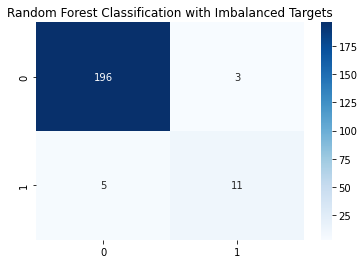

In [20]:
rfc_basic = RandomForestClassifier(random_state=1)
rfc_basic.fit(x_train, y_train)
y_pred_basic = rfc_basic.predict(x_test)

cm_basic = confusion_matrix(y_test, y_pred_basic)
sns.heatmap(cm_basic, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest Classification with Imbalanced Targets')
plt.show()

cr_basic = classification_report(y_test, y_pred_basic, output_dict=True)
pd.DataFrame(cr_basic).transpose()

Нижче наведено процес та результат навчання моделі кластеризації методом k–середніх — методу машинного навчання для розв'язання задачі кластеризації шляхом впорядкування множини об'єктів в порівняно однорідні групи.

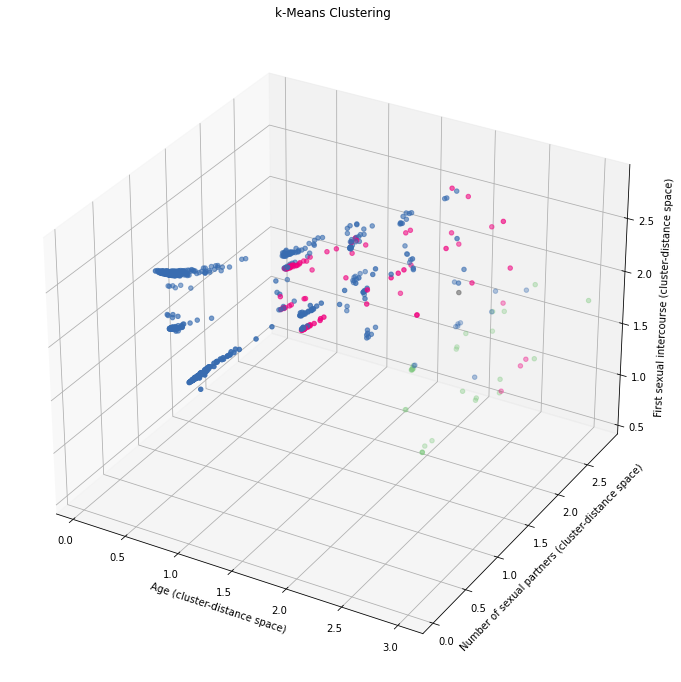

In [21]:
scl = MinMaxScaler()
x_scaled = scl.fit_transform(x)

kmeans = KMeans(n_clusters=12, random_state = 1)
x_tf = kmeans.fit_transform(x_scaled)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_tf[:,0], x_tf[:,1], x_tf[:,2], c=kmeans.predict(x), cmap='Accent')
ax.set_title('k-Means Clustering')
ax.set_xlabel('Age (cluster-distance space)')
ax.set_ylabel('Number of sexual partners (cluster-distance space)')
ax.set_zlabel('First sexual intercourse (cluster-distance space)')

plt.show()


### 4. Чи є можливість покращити метрики, змінивши параметри моделі та її параметри тренування? Або за допомогою зміни/трансформації даних? Проведіть оновлене тренування, де ваші метрики покращаться.

Нижче наведено процес та результат оптимізації моделі випадкового лісу шляхом перетворення даних з використанням алгоритму SMOTE (Synthetic Minority Over-sampling Technique) для створення надмірної вибірки другорядного класу (діагностування раку шийки матки) для моделі незбалансованої класифікації з метою збалансування переважного та другорядного класів.

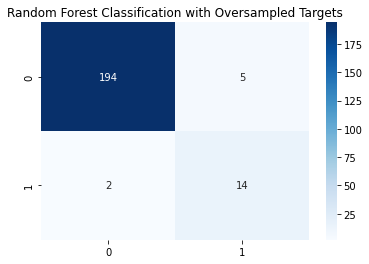

In [22]:
smote = SMOTE(random_state=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

rfc_smote = RandomForestClassifier(random_state=1)
rfc_smote.fit(x_train, y_train)
y_pred = rfc_smote.predict(x_test)

cm_smote = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_smote, annot=True, fmt='g', cmap='Blues')
plt.title('Random Forest Classification with Oversampled Targets')
plt.show()

cr_smote = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr_smote).transpose()

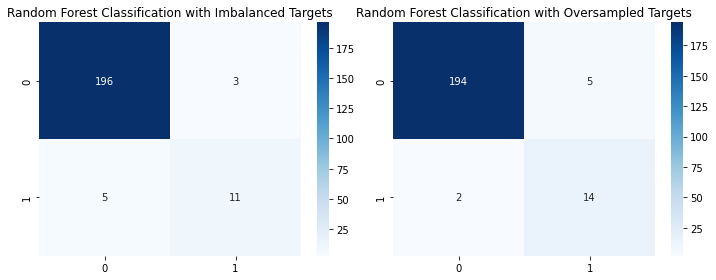

In [23]:
plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1)
ax.set_title('Random Forest Classification with Imbalanced Targets')
sns.heatmap(cm_basic, annot=True, fmt='g', cmap='Blues')

ax = plt.subplot(1, 2, 2)
ax.set_title('Random Forest Classification with Oversampled Targets')
sns.heatmap(cm_smote, annot=True, fmt='g', cmap='Blues')

plt.tight_layout()
plt.show()

Нижче наведено процес та результат оптимізації моделі кластеризації методом k–середніх шляхом обчислення параметру інерції для різних значень кількості кластерів у результаті обчислення та вибору оптимального значення для перенавчання моделі з покращенням результату кластеризації.

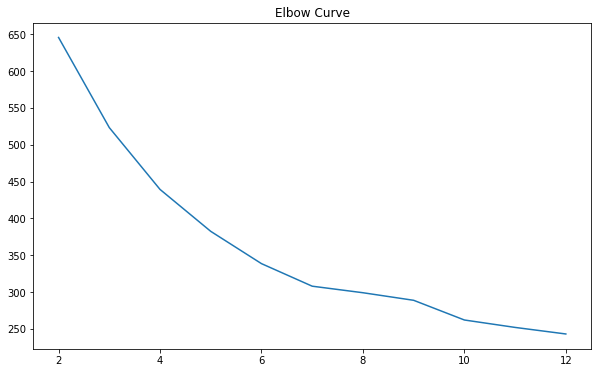

In [24]:
sse = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 13), sse)
plt.title('Elbow Curve')

plt.show()

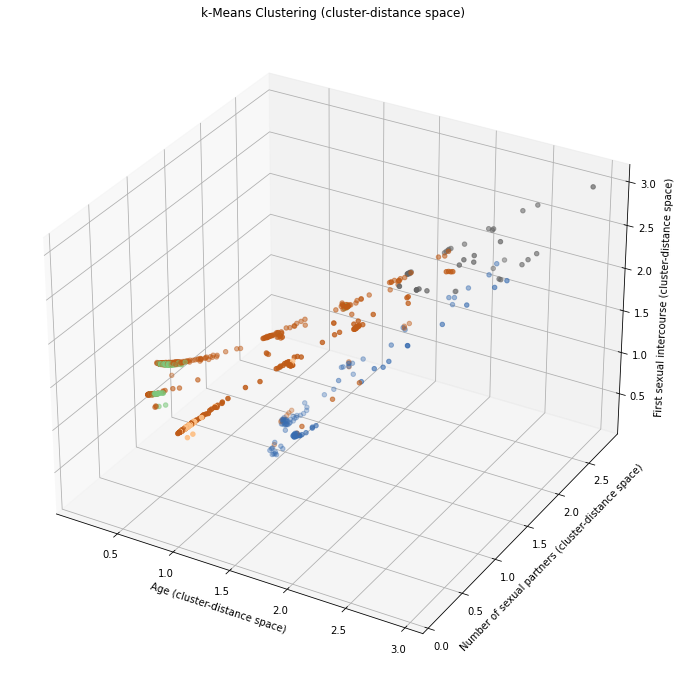

In [25]:
kmeans = KMeans(n_clusters=5, random_state = 1)
x_tf = kmeans.fit_transform(x_scaled)

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(x_tf[:,0], x_tf[:,1], x_tf[:,2], c=kmeans.predict(x), cmap='Accent')
ax.set_title('k-Means Clustering (cluster-distance space)')
ax.set_xlabel('Age (cluster-distance space)')
ax.set_ylabel('Number of sexual partners (cluster-distance space)')
ax.set_zlabel('First sexual intercourse (cluster-distance space)')

plt.show()

### 5. Застосуйте вашу модель на одному окремому прикладі з набору даних. Що вона вертає у відповідь? Що значить даний повернений обʼєкт або тип?

В результаті застосування моделі на одному окремому прикладі з набору даних було повернено масив розміром 1 елемент з результатом класифікації для заданого обʼєкту.

In [26]:
type(x[0].reshape(1, -1))

numpy.ndarray

In [27]:
y_pred = rfc_basic.predict(x[0].reshape(1, -1))

print(f'Value of {type(y_pred)} type is {y_pred}')

Value of <class 'numpy.ndarray'> type is [0]


# Лабораторна робота №5

# Лабораторна робота №5: Моделювання (частина II)

*Мета: Використати нові інструменти і алгоритми з sckit learn для тренування більш якісних моделей.* 

### 1. Використайте метод train_test_split для того, щоб отримати набір для тренування і тестування моделі.

In [28]:
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
x = imp.fit_transform(x)

scl = MinMaxScaler()
x = scl.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=1)

smote = SMOTE(random_state=1)
x_train, y_train = smote.fit_resample(x_train, y_train)

### 2. Оберіть метод, який би хотіли використати для ваших даних - наведіть приклади, щоб ви хотіли за допомогою нього отримати та аргументуйте чому обрали його (конкретний алгоритм).

Для задачі класифікації респондентів до двох встановлених класів (респонденти з передбаченою відсутністю раку шийки матки та респонденти з передбаченим захворюванням) в залежності від значення фізіологічних і соціологічних ознак та ознак з анамнезу респондента розроблена модель може створена на основі різних класифікаторів з характерною математичною моделлю.

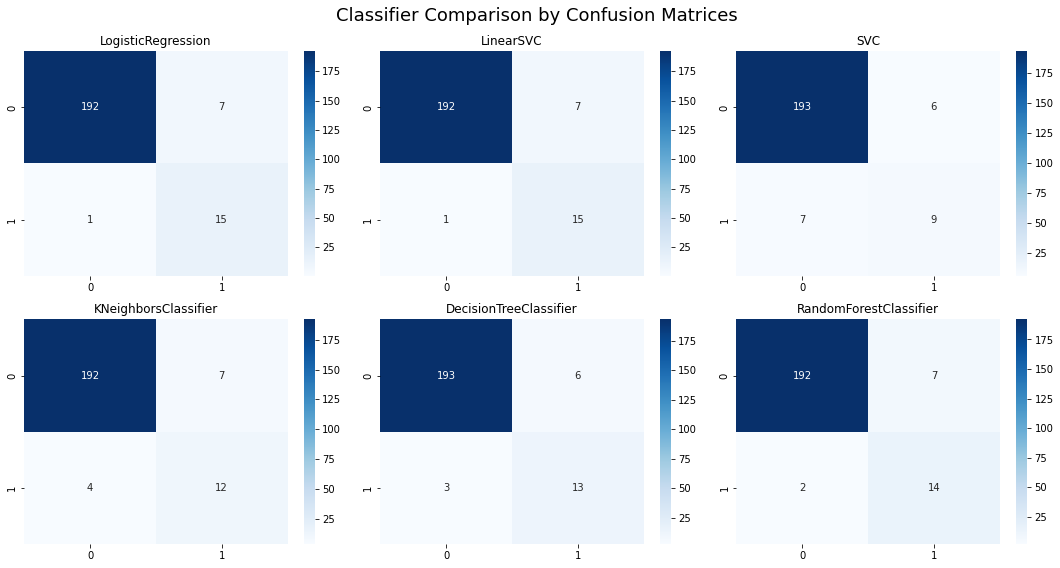

In [29]:
classifiers = [
    LogisticRegression(),
    LinearSVC(C=1),
    SVC(gamma=2, C=1),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=8),
    RandomForestClassifier(max_depth=8, n_estimators=10, max_features=5)
]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.ravel()

fig.suptitle('Classifier Comparison by Confusion Matrices', fontsize=18)

for idx, classifier in enumerate(classifiers):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    sns.heatmap(confusion_matrix(y_test, y_pred), ax=axs[idx], annot=True, fmt='g', cmap='Blues')
    axs[idx].set_title(classifier.__class__.__name__)

plt.tight_layout()
plt.show()

В результаті проведення порівняльного аналізу різних класифікаторів та сформування обчислених матриць невідповідностей, було прийнято рішення обрати **модель випадкового лісу**, оскільки при відносно високому значенню повноти кількість хибно позитивних оцінок є меншою.

Нижче наведено результати гіпероптимізації параметрів моделі випадкового лісу в результаті перехресного затверджування.

In [30]:
# params = { 
#     'n_estimators': [200, 300, 400, 500],
#     'max_features': ['sqrt', 'log2'],
#     'max_depth' : [7, 8, 9, 10, 11, 12],
#     'criterion' :['gini', 'entropy'],
#     'random_state' : [1]
# }

# rfc_cv = GridSearchCV(RandomForestClassifier(), params, scoring='accuracy', cv=3)
# rfc_cv.fit(x_train, y_train)

# rfc_cv.best_params_

### 3. Використайте метод на своїх даних, натренувавши модель. Наведіть метрику після тренування на ваших тестових даних.
 

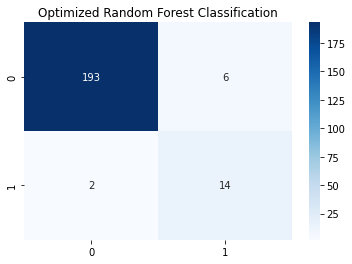

In [31]:
rfc_opt = RandomForestClassifier(max_depth=12, max_features='sqrt', max_leaf_nodes=9, n_estimators=500, random_state=1, criterion='gini')
rfc_opt.fit(x_train, y_train)
y_pred_opt = rfc_opt.predict(x_test)

sns.heatmap(confusion_matrix(y_test, y_pred_opt), annot=True, fmt='g', cmap='Blues')
plt.title('Optimized Random Forest Classification')
plt.show()

cr_opt = classification_report(y_test, y_pred_opt, output_dict=True)
pd.DataFrame(cr_opt).transpose()


### 4. Порівняйте отриману метрику з метрикою моделі з попередньої лабораторної роботи - на скільки відсотків змінився результат моделі?

In [32]:
pd.DataFrame(cr_opt).transpose() - pd.DataFrame(cr_basic).transpose()

,precision,recall,f1-score,support
0,0.014619,-0.015075,-0.000305,0.0
1,-0.085714,0.187500,0.044444,0.0
accuracy,0.000000,0.000000,0.000000,0.0
macro avg,-0.035548,0.086212,0.022070,0.0
weighted avg,0.007153,0.000000,0.003026,0.0


# Лабораторна робота №6

# Лабораторна робота №6: Оцінювання моделі

*Мета: Опрацювати етап evaluation у процесі CRISP-DM для обраної задачі.* 

### 1. Оберіть метрику, яку ви використаєте для ваших даних і задачі, та аргументуйте, чому було обрано саме її.

Для задачі класифікації за найбільш репрезентативну метрику було обрано **істинно позитивний рівень**, або параметр повноти (англ. recall), що за визначенням є рівним відношенню прогнозованих істинно позитивних ознак до загальної кількості позитивних станів у набору даних.

Для медичних задач обрана метрика є найважливішою через необхідність найбільшого виявлення істинно позитивних станів, а велике відношення прогнозованих хибно негативних станів (помилок II роду) є неприпустимим для затвердження побудованої моделі.

### 2. Використайте вашу обрану метрику на натренованій моделі для тестових даних. Наведіть результати метрики для моделей з попередніх лабораторних робіт.

In [33]:
pd.DataFrame(
    data=[recall_score(y_test, y_pred_basic), recall_score(y_test, y_pred_opt)],
    index=['Random Forest Classifier', 'Tuned Random Forest Classifier'],
    columns=['Recall']
)

,Recall
Random Forest Classifier,0.6875
Tuned Random Forest Classifier,0.8750



### 3. Як результати метрики вашої моделі можна перевести у бізнес метрики? Чим ваша друга модель краща за першу?

Згідно з наведеними вище результатів (див. фраг. 33), можна дійти висновку, що приблизно на 20% більше позитивних станів буде виявлено серед пацієнтів, що звертаються за діагностикою раку шийки матки.

Для обраного набору даних з 858 респондентів, 55 респондентів належать до позитивного стану. Так, для натренованої моделі, на 11 респондентів  більше буде віднесено для істинно позитивного класу.

In [34]:
df['Biopsy'].value_counts()

# Лабораторна робота №7

# Лабораторна робота №7: Розгортання та презентація

*Мета: Використати створену модель для веб-сервісу/програми або представити дослідницькі результати у вигляді презентації.* 

### 1. Використати pickle (стандартний інструмент для серіалізації у python) для збережння стану натренованої моделі.

In [35]:
with open('rfc.pickle', 'wb') as f:
    pickle.dump(rfc_opt, f, pickle.HIGHEST_PROTOCOL)

### 2. Збережену модель завантажити і використати у вашому коді, який буде надавати доступ до натренованої моделі. 

In [36]:
with open('rfc.pickle', 'rb') as f:
    rfc = pickle.load(f)

### 3. Надати файл моделі, програмний код веб-сервісу і демонстрацію роботи програми.

Репозиторій програмного коду розробленого API для класифікації раку шийки матки було завантажено до вебсервісу [GitHub](https://github.com/monjasa/cervical-cancer-risk-classification).